# Overview

## Objective
Our goal is to visualize relationships between variables to uncover unhealthy habits that lead to strokes. In addition, we seek to build models that are able to predict the probability a stroke will occur given a variety of health factors. We are using a Stroke dataset that we obtain from [Kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

## Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.

## Attribute Information
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

## Load the Stroke dataset

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv', sep = ',')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
from pandas_profiling import ProfileReport

report = ProfileReport(data, title = 'EDA')
report.to_file(output_file = 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
report.to_notebook_iframe()

Looking at the dataset above we can see that we various types of variables. Hypertension, heart_disease, and stroke are coded as binary variables. The gender, ever_married, work_type, Residence_type, and smoking_status are categorical variables that we may need to code as binary variables in order to perform exploratory data analysis and build predictive models. The age, avg_glucose_level, and bmi are continuous numerical variables.

## Checking Data info and Checking for missing values

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [93]:
data.isnull().sum().sort_values(ascending = False)

bmi                  201
stroke                 0
smoking_status         0
avg_glucose_level      0
Residence_type         0
work_type              0
ever_married           0
heart_disease          0
hypertension           0
age                    0
gender                 0
id                     0
dtype: int64

In [94]:
round(data['bmi'].isnull().sum()/len(data)*100, 2)

3.93

Looking at the data's info above, we see that there are 201 missing values for the bmi variable. In other words the vmi variable is missing about 3.93% of values. In. order to use the variable in our models we are going to need to find a way to account for the missing values. We could either use the mean or median as a placeholder for the missing values.

## Summary Statistics

### Numerical Variables

In [95]:
round(data.describe(exclude = 'object'), 2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


Looking at the summary statistics we notice a few interesting things. First, we once again see the 201 missing values for bmi. Another thing we notice for bmi is the max value. We seet the max value for bmi is 97.6. However, a bmi over 30 is considered overweight and a bmi over 40 is considered class III extreme Obesity. Another strange finding comes from the age variable. Looking at the minimum value for age we see 0.08.

### Categorical Variables

In [96]:
round(data.describe(exclude = ['float','int64']), 2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Looking at the summary statistics for categorical variables, we do not see anything unsual or worrying. We do notice that the majority of individuals are female. We also notice a majority are married, work private sector job, and live in an urban area. We also notice the largest category for smoking_status is never smoked, but it seems that variable will be more evenly distrubted among the 4 different possible options.

In the above section, we filled all the missing values in the bmi column with the median of all values for bmi. We decided to use median, but the mean is not far off (28.1 vs 28.89).

# Data Visualization

## Checking the Proportion of people who have either suffered or not suffered a stroke in the dataset

In [97]:
print("Percentage of People who have Suffered a Stroke")
print(round((data['stroke'].sum()/5110)*100, 2),'%')

print('Percentage of People who have NOT Suffered a Stroke')
print(100-round((data['stroke'].sum()/5110)*100, 2),'%')

Percentage of People who have Suffered a Stroke
4.87 %
Percentage of People who have NOT Suffered a Stroke
95.13 %


## Graphing the proportion of strokes present in the dataset

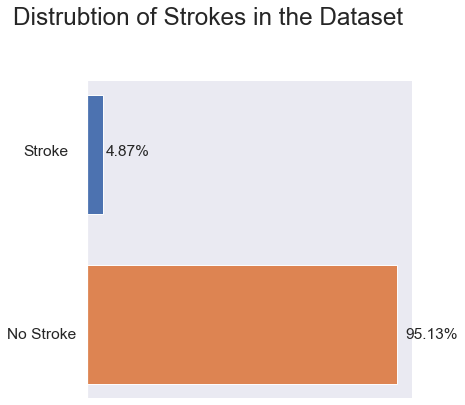

In [98]:
x = pd.DataFrame(data.groupby(['stroke'])['stroke'].count())

fig, ax = plt.subplots(figsize = (6,6), dpi = 70)

# Adding a Title
plt.text(-1150, 1.77, 'Distrubtion of Strokes in the Dataset', {'size':25})

# Create the bar for healthy people who have not suffered a stroke 
ax.barh([1], x.stroke[1], height = 0.7)
plt.text(-1250,-0.08, 'No Stroke',{'size':16})

# Create a label that shows the percentage of people who have not suffered a stroke
plt.text(5000,-0.08, '95.13%',{'size':16})

# Create the bar for people who have suffered a stroke
ax.barh([0], x.stroke[0], height = 0.7)
plt.text(-1000,1, 'Stroke',{'size':16})

# Create a label that shows the percentage of people who have suffered a stroke
plt.text(300,1, '4.87%', {'size':16})

# Get rid of the x and y axis
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Get rid of the borders
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

As you can see from the chart, the dataset is highly unbalanced. The majority of people in the dataset have not suffered a stroke. In order to build a proper model, we have to balance our dataset, since the instance we are trying to predict occurs so rarely in our dataset. In order to accomplish this we use the SMOTE package to oversample the amount of strokes to achieve a balanced dataset.

## Visualization for Gender

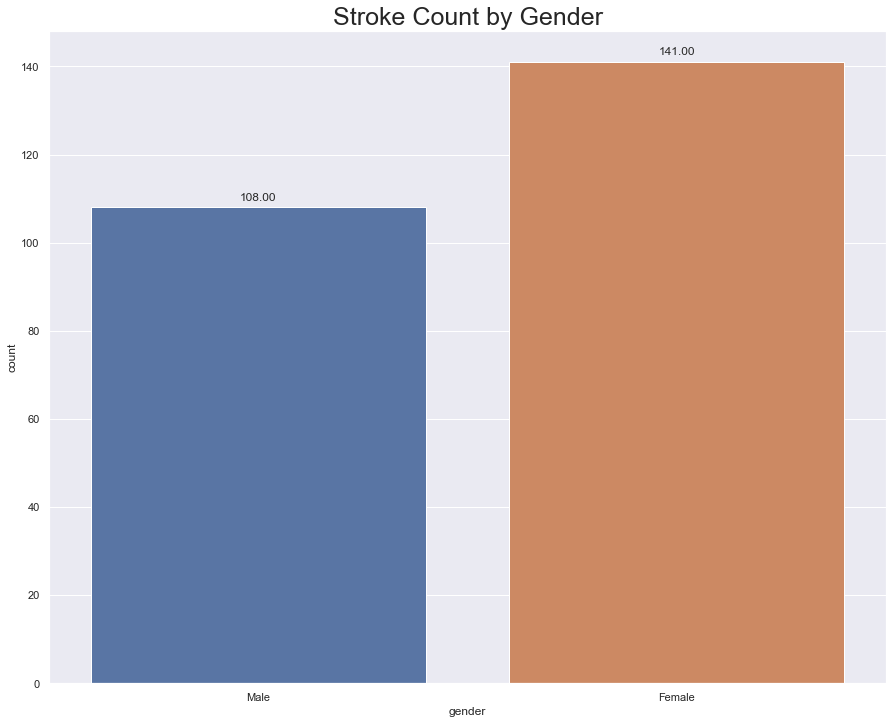

In [101]:
plt.figure(figsize = (15,12))

stroke = data.loc[data['stroke'] == 1]
gender = sns.countplot(data = stroke, x = 'gender')
gender.set_title('Stroke Count by Gender').set_fontsize(25)

for p in gender.patches:
    gender.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

This graph shows the distribution of the total number of strokes across gender. So of all the strokes that occur in our dataset the major can be attributed to women. However in order to get more inside we should look at the proportion of strokes within each gender. That is to say what percentage of men and women suffer strokes.

In [12]:
print(data.gender.value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Looking at the above, we see that over the total dataset we have 2994 women, 2115 men, and one person who identifies as other. 

In [13]:
stroke = data.loc[data['stroke'] == 1]
print(stroke.gender.value_counts())

Female    141
Male      108
Name: gender, dtype: int64


Now after creating a subset of data that only includes individuals who suffered a stroke, we see that there are 141 women and 108 men who suffered strokes.

In [14]:
print(round((141/2994)*100,2),"% of women in the dataset suffer strokes")
print(round((108/2115)*100,2),"% of men in the dataset suffer strokes")

4.71 % of women in the dataset suffer strokes
5.11 % of men in the dataset suffer strokes


So while looking at the countplot from before it may seem that women are more likely to suffer strokes that is NOT the case. While more women suffer strokes, the proportion of men that suffer strokes is higher than women.

## Visualization for Marital Status

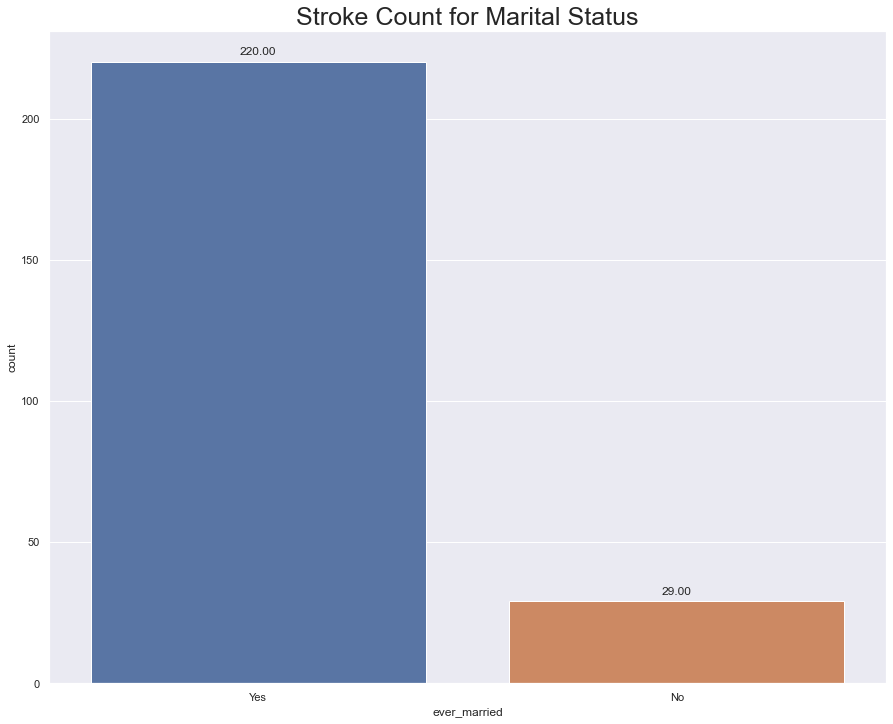

In [103]:
plt.figure(figsize = (15,12))

stroke = data.loc[data['stroke'] == 1]
marriage = sns.countplot(data = stroke, x = 'ever_married')
marriage.set_title('Stroke Count for Marital Status').set_fontsize(25)

for p in marriage.patches:
    marriage.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

This graph shows the total number of strokes among marriage status. So there were 220 people who are married that suffered strokes. There are 29 people who are not married who suffered strokes. Looking at this, we're tempted to say that you are more likely to suffer a stroke if you are marreied. However, again we need to know the percentage of married and single people who suffer strokes instead of the total count.

In [104]:
print(data.ever_married.value_counts())

Yes    3353
No     1757
Name: ever_married, dtype: int64


This is the data for the overall dataset. There are 3353 people who are married in the overall dataset and 1757 people who are single in the overall dataset. The distribution of married and single people is quite different. There are many more married people than single people in the overall dataset.

In [105]:
stroke = data.loc[data['stroke'] == 1]
print(stroke.ever_married.value_counts())

Yes    220
No      29
Name: ever_married, dtype: int64


This shows the number of married and single people who suffered strokes. 220 married people suffered strokes and 29 single people suffered strokes.

In [106]:
print(round((220/3353)*100,2),"% of married people in the dataset suffer strokes")
print(round((29/1757)*100,2),"% of single people in the dataset suffer strokes")

6.56 % of married people in the dataset suffer strokes
1.65 % of single people in the dataset suffer strokes


This backs up what we saw in the countplot for strokes among martial status. There are many more married people who suffered strokes compared to single people. The proportion of married people who suffer strokes is also higher than the proportion of single people who suffer strokes.

## Visualization for Urban and Rural locations

In [107]:
urban = data[data['Residence_type'] == 'Urban'].groupby(['stroke'])['Residence_type'].count().reset_index()

rural = data[data['Residence_type'] == 'Rural'].groupby(['stroke'])['Residence_type'].count().reset_index()

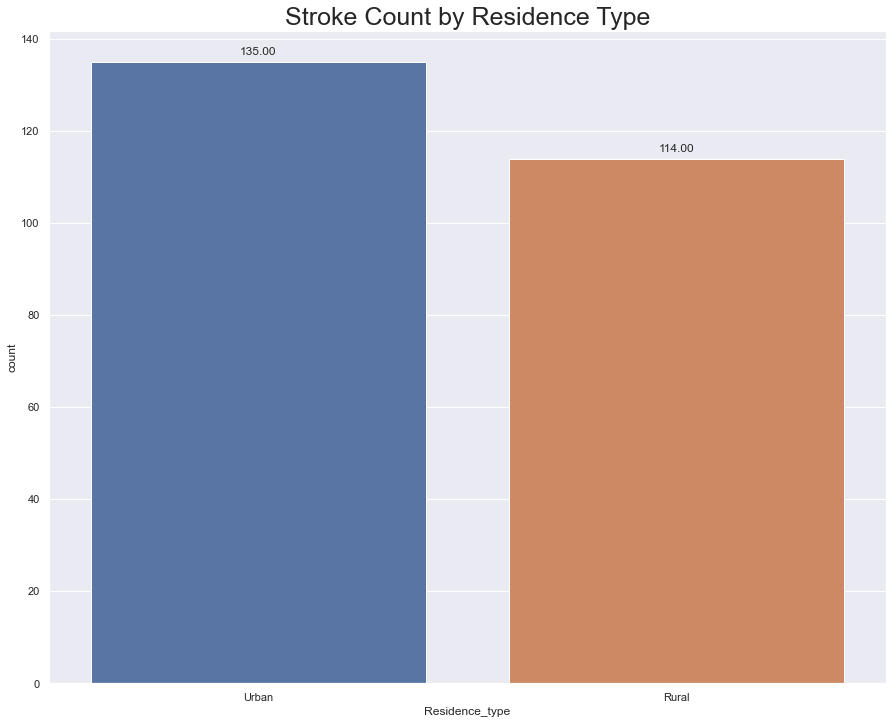

In [108]:
plt.figure(figsize = (15,12))

stroke = data.loc[data['stroke'] == 1]
residence = sns.countplot(data = stroke, x = 'Residence_type')
residence.set_title('Stroke Count by Residence Type').set_fontsize(25)

for p in residence.patches:
    residence.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

This graph shows the overall count of strokes among residence types. There are 135 people living in an urban resdience who suffered strokes. There are 114 people living in a rural residence who suffered strokes.

In [23]:
print(data.Residence_type.value_counts())

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


This shows the overall split of urban and rural residence types in the overall dataset. There are 2596 people who live in urban residences and 2514 people who live in rural residences. There is about an even split between urban and rural residences in the overall dataset.

In [24]:
stroke = data.loc[data['stroke'] == 1]
print(stroke.Residence_type.value_counts())

Urban    135
Rural    114
Name: Residence_type, dtype: int64


This shows the number of people who suffered strokes that live in urban and rural residences. There are 135 people who suffered strokes and lived in an urban residence. There are 114 people who suffered a stroke and live in a rural residence.

In [25]:
print(round((135/2596)*100,2),"% of Urban Residents suffer strokes")
print(round((114/2514)*100,2),"% of Rural Residents suffer strokes")

5.2 % of Urban Residents suffer strokes
4.53 % of Rural Residents suffer strokes


So overall Urban residence account for more strokes than Rural residences. In addition, the proportion of people in urban residences who suffer strokes is higher than the proportion of people in rural residences who suffer strokes. 

## Visualization for Work Type

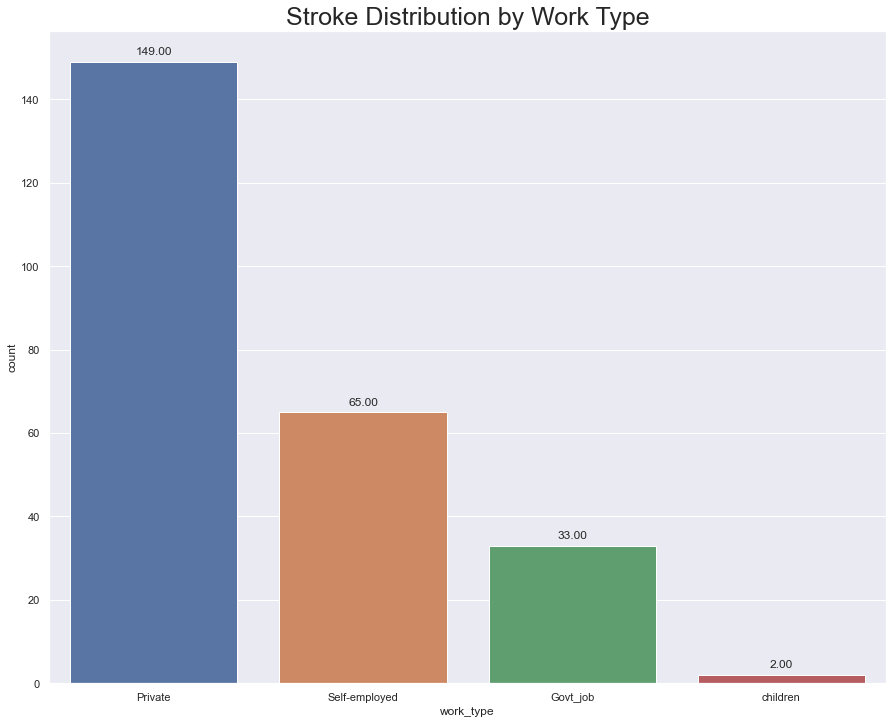

In [109]:
plt.figure(figsize = (15, 12))

stroke = data.loc[data['stroke'] == 1]
workType = sns.countplot(data = stroke, x = 'work_type')
workType.set_title('Stroke Distribution by Work Type').set_fontsize(25)

for p in workType.patches:
    workType.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

This graph shows us the count total of strokes among work types. We see that the private sector accounts for the most strokes in the dataset. However, we don't know the distrbution of worktypes in the dataset. So we want to find the proportion of strokes suffered by people in each category.

In [28]:
print(data.work_type.value_counts())

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Here we see that number of people in each category of work type in the overall dataset. Here we see that the private sector accounts for the majority of people. This explains why the majority of strokes in the dataset came from people working in the dataset.

In [29]:
print(stroke.work_type.value_counts())

Private          149
Self-employed     65
Govt_job          33
children           2
Name: work_type, dtype: int64


This shows us the number of people in each work type that suffered strokes.

In [30]:
print(round((149/2925)*100,2),"% of people who work in the private sector suffered strokes")
print(round((65/819)*100,2),"% of people who are self-employed suffered strokes")
print(round((33/657)*100,2),"% of people who work for the government suffered strokes")
print(round((2/687)*100,2),"% of children suffered strokes")

5.09 % of people who work in the private sector suffered strokes
7.94 % of people who are self-employed suffered strokes
5.02 % of people who work for the government suffered strokes
0.29 % of children suffered strokes


Looking at this we see that our previous count plot is deceiving. The countplot from before may lead someone to think that working in the private sector may lead to the highest risk of suffering a stroke. However, people in the private sector and in government suffer stroke at about the same rate of 5%. Meanwhile, people who are self-employed suffer strokes at a higher rate of almost 8% even though they account for a lower amount of oversations in the data set compared to the private sector.

## Visualization for Smoking Status

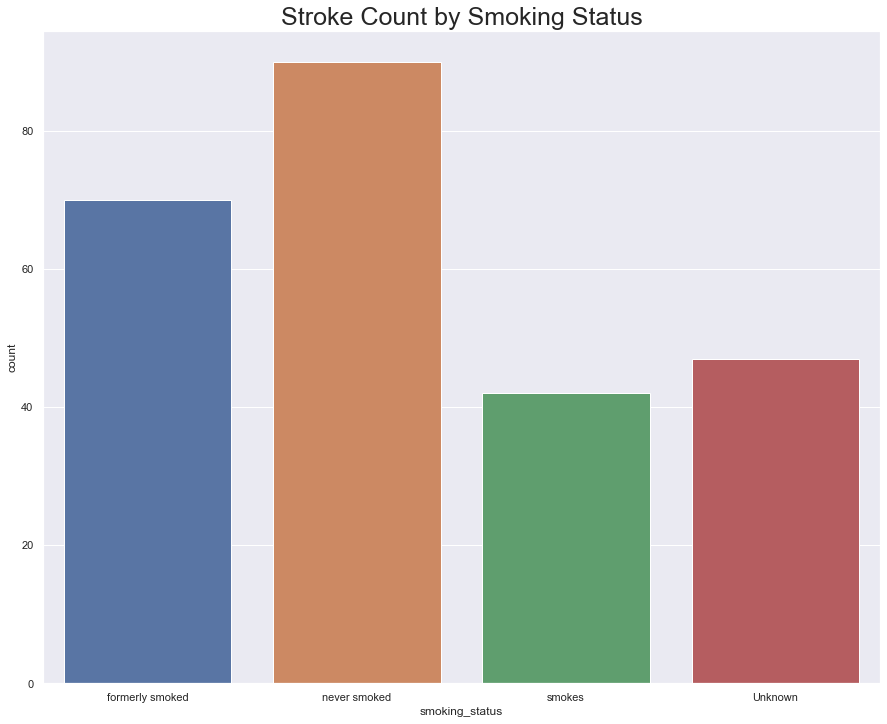

In [111]:
plt.figure(figsize = (15,12))

stroke = data.loc[data['stroke'] == 1]
smoking = sns.countplot(data = stroke, x = 'smoking_status')
smoking.set_title('Stroke Count by Smoking Status').set_fontsize(25)

plt.show()

This countplot shows that people who never smoked accounts for the majority of strokes in our data set. We need to figure out the proportion of strokes among each category to get a more accurate look at whether smoking status may have a relationship with strokes.

In [33]:
print(data.smoking_status.value_counts())

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


This shows us the overall counts of each category of smoking type in the overall dataset. We see that the majority of people never smoked.

In [34]:
print(stroke.smoking_status.value_counts())

never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: smoking_status, dtype: int64


This gives us the total number of strokes for each category of smoking status.

In [35]:
print(round((90/1892)*100,2),"% of people never smoked suffered strokes")
print(round((47/1544)*100,2),"% of people with an unknown smoking status suffered strokes")
print(round((70/885)*100,2),"% of people who formerly smoked sufferdd strokes")
print(round((42/789)*100,2),"% of people who smoke sufferd strokes")

4.76 % of people never smoked suffered strokes
3.04 % of people with an unknown smoking status suffered strokes
7.91 % of people who formerly smoked sufferdd strokes
5.32 % of people who smoke sufferd strokes


Here see that our countplot was indeed deceiving. In our countplot, it seemed as if smoking status may not be a factor in prediction strokes. However, looking at the proportion of strokes in each category, we see that people who smoke or formely smoked suffer strokes at a higher rate than people who never smoked or have an unknown smoking status. 

## Creating bins for BMI, Age, and Average Gluclose Level

In [36]:
# Binning numerical variables for analysis

data['BMI Category'] = pd.cut(data['bmi'], bins = [0,19,25,30,100], 
                    labels = ['Underweight','Normal','Overwweight','Obese'])

data['Age Category'] = pd.cut(data['age'], bins = [0,13,18,45,60,100], 
                    labels = ['Childern','Teens','Young Adults','Middle Aged Adults', 'Elderly'])

data['Glucose Level Category'] = pd.cut(data['avg_glucose_level'], bins = [0,90,160,230,300], 
                    labels = ['Low','Normal','High','Very High'])

We use bins when visualizing the data set. We created bins to describe the range of bmi from underweight to obese. For age, we created bins to separate children, teens, adults, middle aged adults, and the elderly. Similarly for avg_glucose_level, we created bins to show the range of levels from low to very high.

## Visualization for BMI

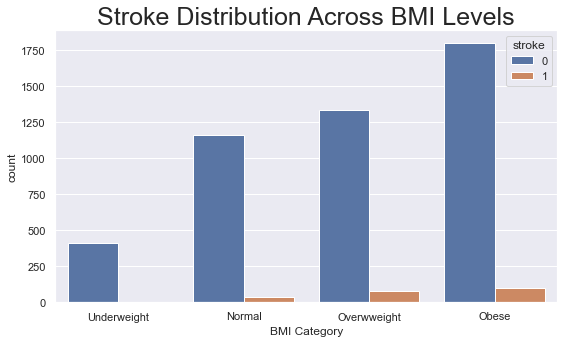

In [37]:
sns.set(rc = {'figure.figsize':(9,5)})

sns.countplot(x = 'BMI Category', hue = 'stroke', data = data).set_title('Stroke Distribution Across BMI Levels').set_fontsize(25)

Here we see that as the range of BMI increases, the chance of a stroke also tends to increase. People who are overweight and obese are at a much higher risk for stroke compared to those who are of normal weight.

## Visualization for Age

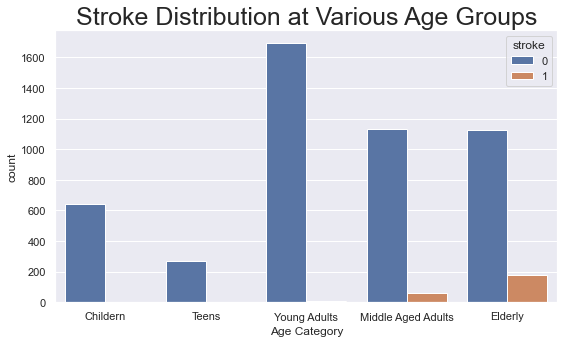

In [38]:
sns.set(rc = {'figure.figsize':(9,5)})

sns.countplot(x = 'Age Category', hue = 'stroke', data = data).set_title('Stroke Distribution at Various Age Groups').set_fontsize(25)

We see that older people are at a much higher risk for stroke compared to younger people. Middle aged and elderly people make up the majority of the people who suffered strokes in the dataset. We defined middle aged adults as people between 45 and 60. We defined elderly as people older than 60.

## Visualization for Glucose Levels

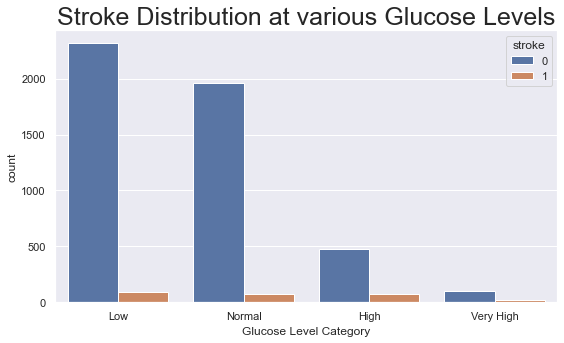

In [39]:
sns.set(rc = {'figure.figsize':(9,5)})

sns.countplot(x = 'Glucose Level Category', hue = 'stroke', data = data).set_title('Stroke Distribution at various Glucose Levels').set_fontsize(25)

This graph is deceiving. Looking at the orange bars it looks like the chances of strokes is even across the low, normal, and high range. However, the low range's cases of strokes is a smaller proportion of total cases compared to the high range.

## Visualization for Hypertension

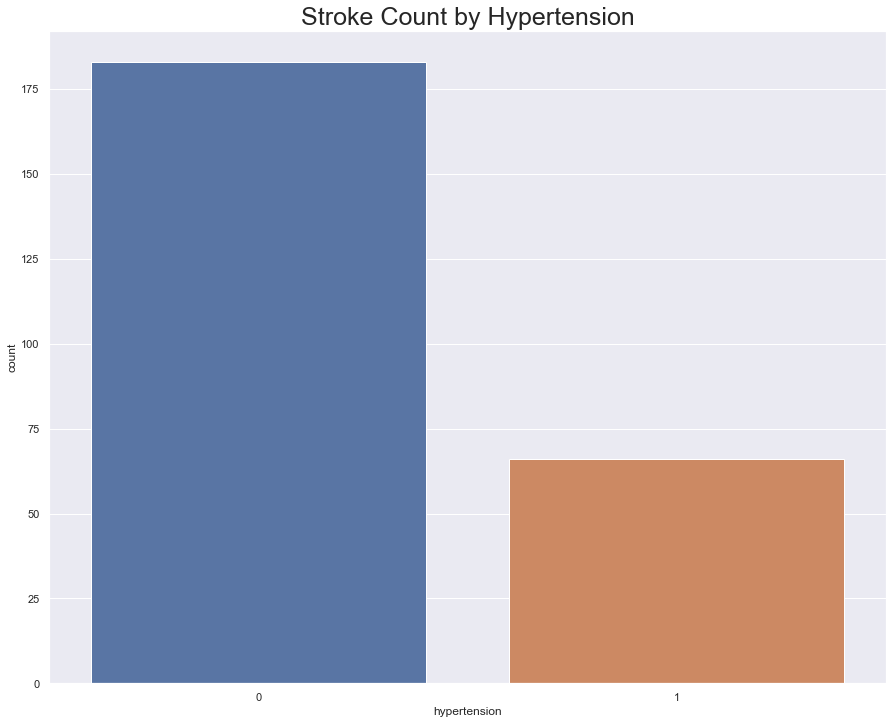

In [114]:
plt.figure(figsize = (15,12))

stroke = data.loc[data['stroke'] == 1]
hyper = sns.countplot(data = stroke, x = 'hypertension')
hyper.set_title('Stroke Count by Hypertension').set_fontsize(25)

plt.show()

This countplot shows that a majority of people who suffer strokes did not suffer from hypertension. However, we want to look at the proportion of strokes among hypertension to get a better look at whether hypertension is a significant factor in predicting strokes. 

In [42]:
print(data.hypertension.value_counts())

0    4612
1     498
Name: hypertension, dtype: int64


Total cases of hypertention in the overall data set. Only 498 individuals had a history of hypertension.

In [43]:
print(stroke.hypertension.value_counts())

0    183
1     66
Name: hypertension, dtype: int64


Here we see that of all individuals who suffered strokes, 183 had no history of hypertension and 66 did have hypertension.

In [44]:
print(round((183/4612)*100,2),"% of people who suffer strokes did not have hypertension")
print(round((66/498)*100,2),"% of people who suffer strokes did have a history of hypertension")

3.97 % of people who suffer strokes did not have hypertension
13.25 % of people who suffer strokes did have a history of hypertension


Here see that contrary to the countplot, hypertension may be a factor in prediction strokes. Looking at the countplot and seeing the no hypertension bar being so much higher,, one may mistakingly assume hypertension is not of interest. However, people have a history of hypertension suffer strokes at a much higher rate than people with no hypertension; 13.25% vs 3.97%.

## Visualization for Heart Disease

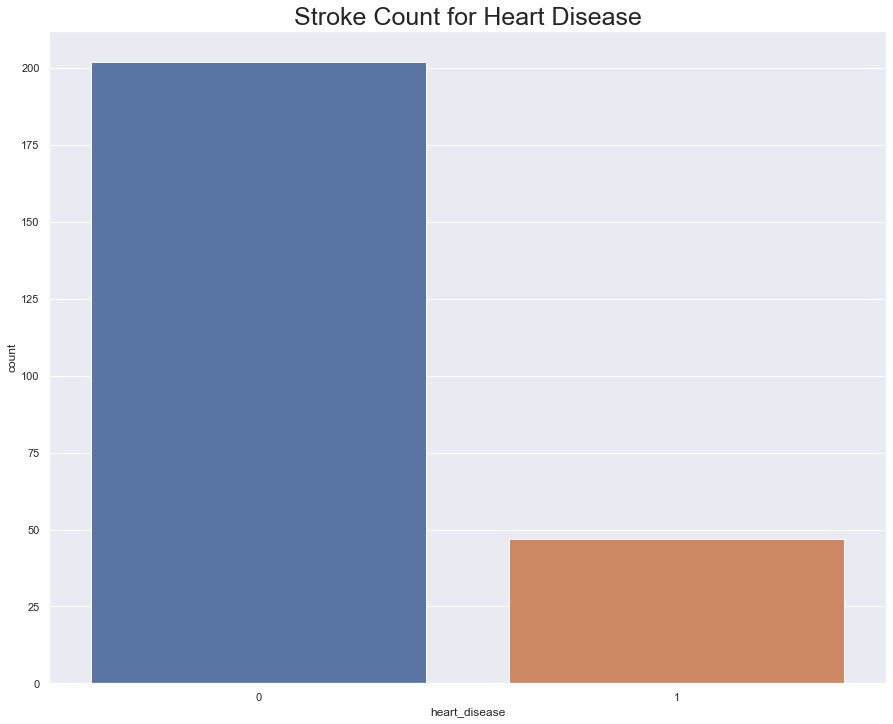

In [115]:
plt.figure(figsize = (15,12))

stroke = data.loc[data['stroke'] == 1]
heartDisease = sns.countplot(data = stroke, x = 'heart_disease')
heartDisease.set_title('Stroke Count for Heart Disease').set_fontsize(25)

plt.show()

This countplot shows that the majority of people who suffered strokes had no history of heart diease. However, we want to find the proportion of people with heart disease or no heart disease that suffer strokes.

In [47]:
print(data.heart_disease.value_counts())

0    4834
1     276
Name: heart_disease, dtype: int64


Overall counts for no heart disease and heart disease in the overall data set.

In [48]:
print(stroke.heart_disease.value_counts())

0    202
1     47
Name: heart_disease, dtype: int64


This shows us of the people who suffered strokes 202 did not have heart disease and 47 did have some form of heart disease.

In [49]:
print(round((202/4834)*100,2),"% of people who suffer strokes did not have heart disease")
print(round((47/276)*100,2),"% of people who suffer strokes did have a history of heart disease")

4.18 % of people who suffer strokes did not have heart disease
17.03 % of people who suffer strokes did have a history of heart disease


## Correlation Heatmap

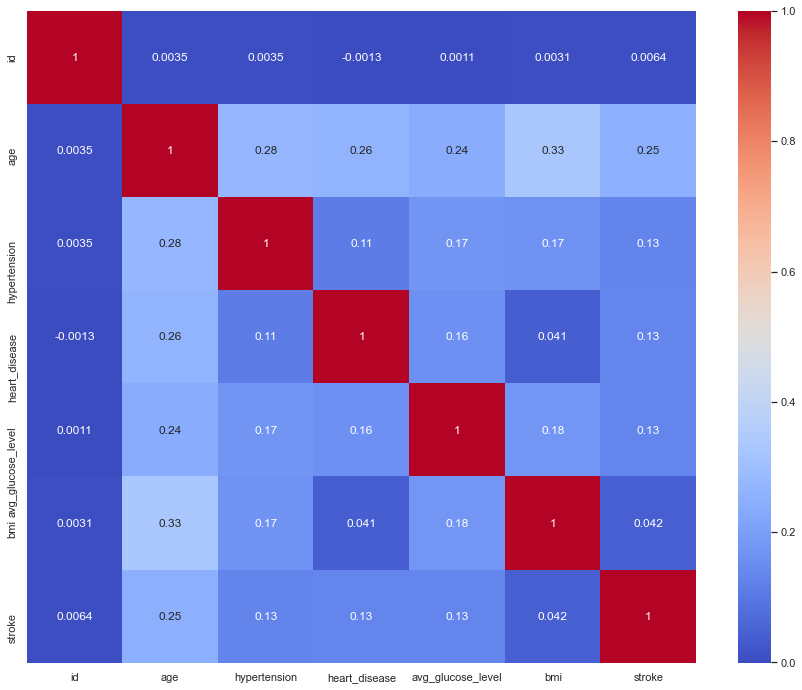

In [50]:
plt.figure(figsize = (15,12))

sns.heatmap(data.corr(), cmap = 'coolwarm', annot = True)

plt.show()

This correlation heatmap does not show a complete picture for our data set. You may notice that our categorical variables are missing We need to process our data in order to get a data set that's apporpriate for modeling.

# Data Processing

## Filling in Missing Values

In [116]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
# Dropping the id column
data.drop(['id'], axis = 1, inplace = True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [117]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Here we see that we were sucessful in filling in all the na values in our dataset.

## Encoding Variables

### Label Encoding

In [53]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [54]:
residence = {'Urban': 0, 'Rural': 1}
data['Residence_type'] = data['Residence_type'].map(residence)

In [55]:
data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [56]:
maritalStatus = {'No': 0, 'Yes': 1}
data['ever_married'] = data['ever_married'].map(maritalStatus)

In [57]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,BMI Category,Age Category,Glucose Level Category
0,Male,67.0,0,1,1,Private,0,228.69,36.6,formerly smoked,1,Obese,Elderly,High
1,Female,61.0,0,0,1,Self-employed,1,202.21,28.1,never smoked,1,NaN,Elderly,High
2,Male,80.0,0,1,1,Private,1,105.92,32.5,never smoked,1,Obese,Elderly,Normal
3,Female,49.0,0,0,1,Private,0,171.23,34.4,smokes,1,Obese,Middle Aged Adults,High
4,Female,79.0,1,0,1,Self-employed,1,174.12,24.0,never smoked,1,Normal,Elderly,High


We used simple label encoding to convert all the categorical variables with only 2 unique values into binary variables.

### One-Hot Encoder

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [59]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [60]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [61]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [62]:
ohe = OneHotEncoder()

## Creating Dummy Variables

In [63]:
data['gender'] = pd.Categorical(data['gender'])
gender_dummies = pd.get_dummies(data['gender'])
gender_dummies

,Female,Male,Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5105,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


In [64]:
data['smoking_status'] = pd.Categorical(data['smoking_status'])
smoking_status_dummies = pd.get_dummies(data['smoking_status'])
smoking_status_dummies

,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5105,0,0,1,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [65]:
data['work_type'] = pd.Categorical(data['work_type'])
work_type_dummies = pd.get_dummies(data['work_type'])
work_type_dummies

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
5105,0,0,1,0,0
5106,0,0,0,1,0
5107,0,0,0,1,0
5108,0,0,1,0,0


## Removing Variables

In [66]:
data.drop('gender', axis = 1, inplace = True)
data.drop('work_type', axis = 1, inplace = True)
data.drop('smoking_status', axis = 1, inplace = True)

# Variables we created when making bins for visualization
data.drop('BMI Category', axis = 1, inplace = True)
data.drop('Age Category', axis = 1, inplace = True)
data.drop('Glucose Level Category', axis = 1, inplace = True)

We remove the gender, work type, and smoking status variables that we just created dummy variables for. We also remove the category bins variables we made for bmi, age, and average gluclose level.

## Adding New Dummy Variables

In [67]:
data = pd.concat([data, gender_dummies], axis = 1)
data = pd.concat([data, work_type_dummies], axis = 1)
data = pd.concat([data, smoking_status_dummies], axis = 1)
data

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,1,0,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,1,202.21,28.1,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,1,105.92,32.5,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,0,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,1,174.12,24.0,1,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,0,83.75,28.1,0,1,0,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,1,0,125.20,40.0,0,1,0,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,1,1,82.99,30.6,0,1,0,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,1,1,166.29,25.6,0,0,1,0,0,0,1,0,0,0,1,0,0


We used the One-Hot-Encoder to encode all the variables with more than 2 unique levels. The reason we created multiple dummy variables is to avoid algorithms from interpreting the values of any single variable as having some hierarchy and thus giving them more value. 

## Scaling Variables

In [68]:
from sklearn.preprocessing import StandardScaler

### Create Scaled Variables

In [69]:
std = StandardScaler()

columns = ['avg_glucose_level', 'bmi', 'age']
scaled = std.fit_transform(data[['avg_glucose_level', 'bmi', 'age']])
scaled = pd.DataFrame(scaled, columns = columns)

### Replace Unscaled Variables with Scaled Versions

In [70]:
# Replacing unscaled columns with scaled columns

data = data.drop(columns = columns, axis = 1)
data = data.merge(scaled, left_index = True, right_index = True, how = 'left')

data

,hypertension,heart_disease,ever_married,Residence_type,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,avg_glucose_level,bmi,age
0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,2.706375,1.005086,1.051434
1,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,2.121559,-0.098981,0.786070
2,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,-0.005028,0.472536,1.626390
3,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1.437358,0.719327,0.255342
4,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1.501184,-0.631531,1.582163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,-0.494658,-0.098981,1.626390
5106,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0.420775,1.446713,1.670617
5107,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,-0.511443,0.225745,-0.363842
5108,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1.328257,-0.423706,0.343796


Here we scale the values of the bmi, average glucose level, and age columns and replace them in the data frame. 

## Updated Correlation Heatmap

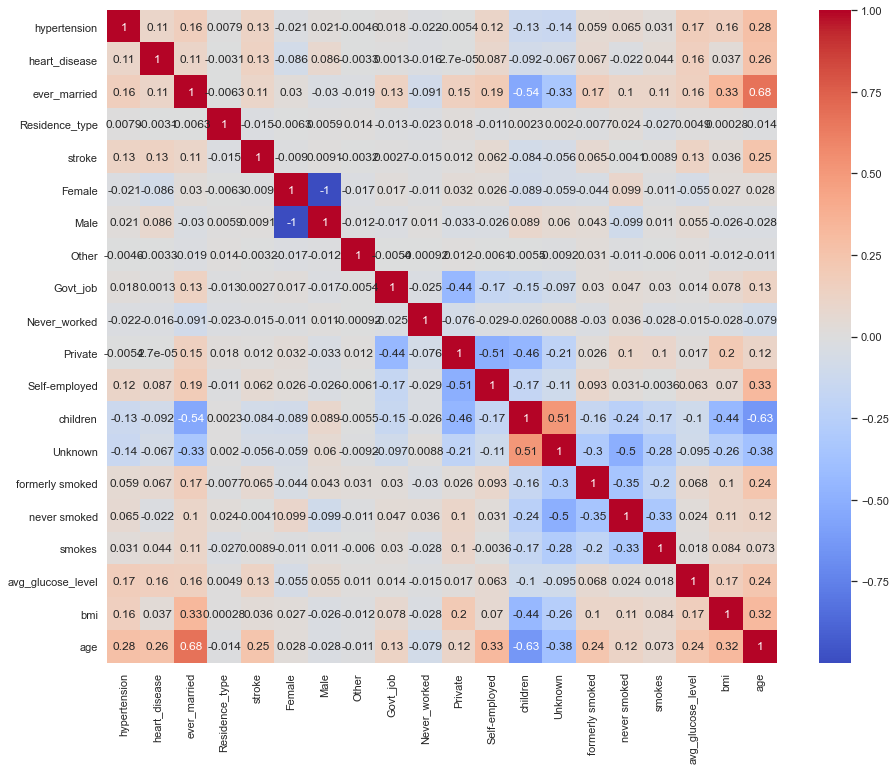

In [71]:
plt.figure(figsize = (15,12))

sns.heatmap(data.corr(), cmap = 'coolwarm', annot = True)

plt.show()

Here we see the updated correlation heatmap with all of our variables for our final data set. We see that age had the most and highest correlations among all variables. We expect age to play a major factor in our model for predicting strokes.

## Over Sampling Using SMOTE

In [72]:
from imblearn.over_sampling import SMOTE

X = data.drop(['stroke'], axis = 1)
Y = data['stroke']

X_smote, Y_smote = SMOTE().fit_resample(X, Y)

print("Before OverSampling, counts of label '1': {}".format(sum(Y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y == 0)))

print("After OverSampling, counts of label '1': {}".format(sum(Y_smote == 1)))
print("AFter OverSampling, counts of label '0': {} \n".format(sum(Y_smote == 0)))

Before OverSampling, counts of label '1': 249
Before OverSampling, counts of label '0': 4861 

After OverSampling, counts of label '1': 4861
AFter OverSampling, counts of label '0': 4861 



The feature we're focusing on are number of strokes in our dataset. Since our data is so highly imbalanced, we need to oversample the number of strokes using the SMOTE packge to get a more accuarate model.

## Splitting Dataset into Test and Train Sets

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, test_size = 0.2, random_state = 20)

print('After OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('After OverSampling, the shape of Y_train: {} \n'.format(Y_train.shape))

print('After OverSampling, the shape of X_test: {}'.format(X_test.shape))
print('After OverSampling, the shape of Y_test: {} \n'.format(Y_test.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("AFter OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))

print("After OverSampling, counts of label '1': {}".format(sum(Y_test == 1)))
print("AFter OverSampling, counts of label '0': {} \n".format(sum(Y_test == 0)))

After OverSampling, the shape of X_train: (7777, 19)
After OverSampling, the shape of Y_train: (7777,) 

After OverSampling, the shape of X_test: (1945, 19)
After OverSampling, the shape of Y_test: (1945,) 

After OverSampling, counts of label '1': 3885
AFter OverSampling, counts of label '0': 3892 

After OverSampling, counts of label '1': 976
AFter OverSampling, counts of label '0': 969 



# Modeling

## Libraries

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

## Logistic Regression

In [75]:
logReg = LogisticRegression()
log_model = logReg.fit(X_train, Y_train)

log_predict = logReg.predict(X_test)
log_confusion_matrix = confusion_matrix(Y_test, log_predict)
log_accuracy = accuracy_score(Y_test, log_predict)

print('Confusion Matirx')
print(log_confusion_matrix)
print('------------------------------------------------------')
print('Accracy of Logistic Regression:', round(log_accuracy*100, 2),'\n')
print('------------------------------------------------------')
print(classification_report(Y_test, log_predict))

Confusion Matirx
[[816 153]
 [143 833]]
------------------------------------------------------
Accracy of Logistic Regression: 84.78 

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       969
           1       0.84      0.85      0.85       976

    accuracy                           0.85      1945
   macro avg       0.85      0.85      0.85      1945
weighted avg       0.85      0.85      0.85      1945



## Linear Regression

In [76]:
linReg = LinearDiscriminantAnalysis()
lin_model = linReg.fit(X_train, Y_train)

lin_predict = linReg.predict(X_test)
lin_confusion_matrix = confusion_matrix(Y_test, lin_predict)
lin_accuracy = accuracy_score(Y_test, lin_predict)

print('Confusion Matirx')
print(lin_confusion_matrix)
print('------------------------------------------------------')
print('Accracy of Linear Regression:', round(lin_accuracy*100, 2),'\n')
print('------------------------------------------------------')
print(classification_report(Y_test, lin_predict))

Confusion Matirx
[[804 165]
 [141 835]]
------------------------------------------------------
Accracy of Linear Regression: 84.27 

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       969
           1       0.83      0.86      0.85       976

    accuracy                           0.84      1945
   macro avg       0.84      0.84      0.84      1945
weighted avg       0.84      0.84      0.84      1945



## Naive-Bayes

In [77]:
nb = GaussianNB()
nb_model = nb.fit(X_train, Y_train)

nb_predict = nb.predict(X_test)
nb_confusion_matrix = confusion_matrix(Y_test, nb_predict)
nb_accuracy = accuracy_score(Y_test, nb_predict)

print('Confusion Matirx')
print(nb_confusion_matrix)
print('------------------------------------------------------')
print('Accracy of Naive-Bayes:', round(nb_accuracy*100,2),'\n')
print('------------------------------------------------------')
print(classification_report(Y_test, nb_predict))

Confusion Matirx
[[165 804]
 [  5 971]]
------------------------------------------------------
Accracy of Naive-Bayes: 58.41 

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.17      0.29       969
           1       0.55      0.99      0.71       976

    accuracy                           0.58      1945
   macro avg       0.76      0.58      0.50      1945
weighted avg       0.76      0.58      0.50      1945



## Decision Tree

In [78]:
DT = DecisionTreeClassifier()
DT_model = DT.fit(X_train, Y_train)

DT_predict = DT.predict(X_test)
DT_confusion_matrix = confusion_matrix(Y_test, DT_predict)
DT_accuracy = accuracy_score(Y_test, DT_predict)

print('Confusion Matirx')
print(DT_confusion_matrix)
print('------------------------------------------------------')
print('Accracy of Decision Trees:', round(DT_accuracy*100,2),'\n')
print('------------------------------------------------------')
print(classification_report(Y_test, DT_predict))

Confusion Matirx
[[862 107]
 [ 79 897]]
------------------------------------------------------
Accracy of Decision Trees: 90.44 

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       969
           1       0.89      0.92      0.91       976

    accuracy                           0.90      1945
   macro avg       0.90      0.90      0.90      1945
weighted avg       0.90      0.90      0.90      1945



## Support Vector Classifer

In [79]:
SVC = SVC()
SVC_model = SVC.fit(X_train, Y_train)

SVC_predict = SVC.predict(X_test)
SVC_confusion_matrix = confusion_matrix(Y_test, SVC_predict)
SVC_accuracy = accuracy_score(Y_test, SVC_predict)

print('Confusion Matirx')
print(SVC_confusion_matrix)
print('------------------------------------------------------')
print('Accracy of Support Vector Classifier:', round(SVC_accuracy*100,2),'\n')
print('------------------------------------------------------')
print(classification_report(Y_test, SVC_predict))

Confusion Matirx
[[834 135]
 [ 77 899]]
------------------------------------------------------
Accracy of Support Vector Classifier: 89.1 

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       969
           1       0.87      0.92      0.89       976

    accuracy                           0.89      1945
   macro avg       0.89      0.89      0.89      1945
weighted avg       0.89      0.89      0.89      1945



## Random Forest

In [80]:
RF = RandomForestClassifier()
RF_model = RF.fit(X_train, Y_train)

RF_predict = RF.predict(X_test)
RF_confusion_matrix = confusion_matrix(Y_test, RF_predict)
RF_accuracy = accuracy_score(Y_test, RF_predict)

print('Confusion Matirx')
print(RF_confusion_matrix)
print('------------------------------------------------------')
print('Accracy of Random Forest Classifier:', round(RF_accuracy*100,2),'\n')
print('------------------------------------------------------')
print(classification_report(Y_test, RF_predict))

Confusion Matirx
[[897  72]
 [ 19 957]]
------------------------------------------------------
Accracy of Random Forest Classifier: 95.32 

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       969
           1       0.93      0.98      0.95       976

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



## K-Nearest Neighbors

In [81]:
KNN = KNeighborsClassifier()
KNN_model = KNN.fit(X_train, Y_train)

KNN_predict = KNN.predict(X_test)
KNN_confusion_matrix = confusion_matrix(Y_test, KNN_predict)
KNN_accuracy = accuracy_score(Y_test, KNN_predict)

print('Confusion Matirx')
print(KNN_confusion_matrix)
print('------------------------------------------------------')
print('Accracy of K-Nearest Neighbors Classifier:', round(KNN_accuracy*100,2),'\n')
print('------------------------------------------------------')
print(classification_report(Y_test, KNN_predict))

Confusion Matirx
[[810 159]
 [ 10 966]]
------------------------------------------------------
Accracy of K-Nearest Neighbors Classifier: 91.31 

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       969
           1       0.86      0.99      0.92       976

    accuracy                           0.91      1945
   macro avg       0.92      0.91      0.91      1945
weighted avg       0.92      0.91      0.91      1945



## Gradient Boosting

In [82]:
GB = GradientBoostingClassifier()
GB_model = GB.fit(X_train, Y_train)

GB_predict = GB.predict(X_test)
GB_confusion_matrix = confusion_matrix(Y_test, GB_predict)
GB_accuracy = accuracy_score(Y_test, GB_predict)

print('Confusion Matirx')
print(GB_confusion_matrix)
print('------------------------------------------------------')
print('Accracy of Gradient Boosting Classifier:', round(GB_accuracy*100,2),'\n')
print('------------------------------------------------------')
print(classification_report(Y_test, GB_predict))

Confusion Matirx
[[794 175]
 [ 98 878]]
------------------------------------------------------
Accracy of Gradient Boosting Classifier: 85.96 

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       969
           1       0.83      0.90      0.87       976

    accuracy                           0.86      1945
   macro avg       0.86      0.86      0.86      1945
weighted avg       0.86      0.86      0.86      1945



# Model Evaluation

In [83]:
models = ['Logistic','Linear','NB','DT','SVC','RF','KNN','GB']

accuracy = [round(log_accuracy*100, 2),round(lin_accuracy*100, 2),round(nb_accuracy*100, 2),round(DT_accuracy*100, 2),
            round(SVC_accuracy*100, 2),round(RF_accuracy*100, 2),round(KNN_accuracy*100, 2),round(GB_accuracy*100, 2)]

model_evaluation = pd.DataFrame({'Model':models, 'Accuracy':accuracy})
model_evaluation

,Model,Accuracy
0,Logistic,84.78
1,Linear,84.27
2,NB,58.41
3,DT,90.44
4,SVC,89.10
5,RF,95.32
6,KNN,91.31
7,GB,85.96


## Plotting Accuracy of Models

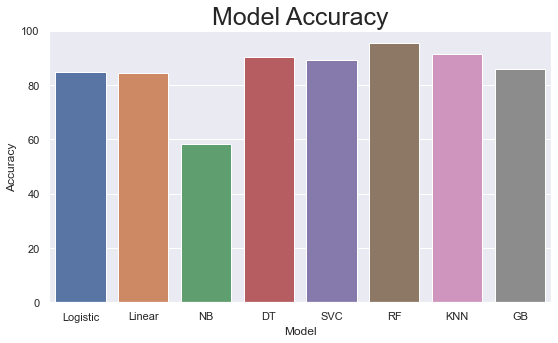

In [84]:
sns.barplot(x = 'Model', y = 'Accuracy', data = model_evaluation).set_title('Model Accuracy').set_fontsize(25)

After running various models, we found that the Random Forest models gives us the highest accuracy score among all models tested. It also had the highest F-score and Recall among all models for both instances of stroke and no stroke. Recall is the ratio of correctly predicted positive obersations. In other words, of all the patients who suffered a stroke, how many did we correctly identify. Similarly, of all patients who did not suffer a stroke, how many did we label correctly.

## Feature Importance

In [85]:
importance = RF.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01807
Feature: 1, Score: 0.01322
Feature: 2, Score: 0.02386
Feature: 3, Score: 0.02674
Feature: 4, Score: 0.01608
Feature: 5, Score: 0.01596
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.01905
Feature: 8, Score: 0.00035
Feature: 9, Score: 0.01949
Feature: 10, Score: 0.01834
Feature: 11, Score: 0.01863
Feature: 12, Score: 0.01981
Feature: 13, Score: 0.01489
Feature: 14, Score: 0.02051
Feature: 15, Score: 0.01425
Feature: 16, Score: 0.17424
Feature: 17, Score: 0.15904
Feature: 18, Score: 0.40748


In [86]:
# Creating a Variable list and removing our target variable from the list
variables = list(data.columns)
variables.remove('stroke')

# Creating an Importance list for the Importance of every Variable
importance = list(importance)

# Creating a dictionary and matching each Variable as a key and its Importance as a value
variableImportance = {'Variables': variables, 'Importance': importance}

# Creating a DataFrame out of the Dictionary we just created
variableImportanceDF = pd.DataFrame(variableImportance, columns = ['Variables', 'Importance'])
variableImportanceDF

,Variables,Importance
0,hypertension,0.018067
1,heart_disease,0.013217
2,ever_married,0.023859
3,Residence_type,0.026738
4,Female,0.016081
5,Male,0.015964
6,Other,0.000002
7,Govt_job,0.019055
8,Never_worked,0.000351
9,Private,0.019494


### Plotting Feature Importance

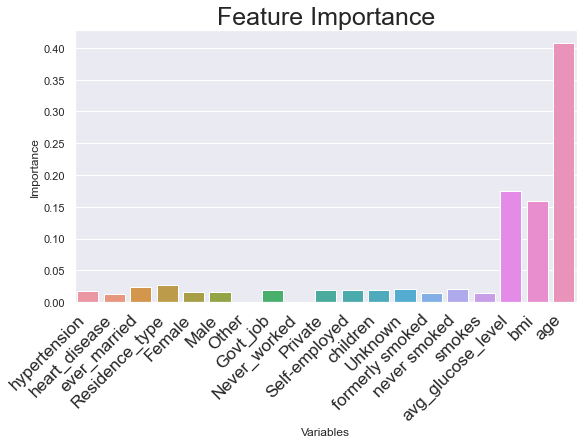

In [87]:
chart = sns.barplot(x = 'Variables', y = 'Importance', data = variableImportanceDF)
# This next line rotates the variable so the names do not overlap and are readable.
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right', fontsize = 'x-large')
chart.set_title('Feature Importance').set_fontsize(25)
plt.show()

Looking at our graph for feature importance we see that variables with the highest predictive power for our Random Forest model are Age, Average Glucose Level, and BMI in that order.

# Conclusion

In conclusion, we were able to build a random forest model with about 95% accuracy in predictions for strokes. We found that age is by far the most important feature in predicting strokes in this dataset. Bmi and average glucose level also were important in predicting strokes accurately. Given that the dataset was a split of 5% for stroke and 95% for no stroke. Oversampling was used in overcoming this imbalance and creating a model with high prediction accuracy. The random forest model is the model with the highest prediction accuarcy when compared to all the other models we tested. In addtion, the Random Forest model had great Recall and Precision scores. In the end, we were able to show that strokes are more likely to occure as we age. This is something we expected, and it further goest to show the importance of living a healthy lifestyle as we get older.